<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/docs/logo.png?raw=true'/></center>

<h1 align = 'center'>Trabalho de Circuitos Elétricos II<h1/>
<h2 align = 'center'>Projeto de Filtro Ativo<h2/>
 

Este projeto tem como objetivo o estudo referente ao dimensionamento de um Filtro Ativo. O projeto está salvo e disponível para consulta em nosso [repositório](https://github.com/MateusPincho/Projeto-Filtros-Ativos/tree/master).

Projetistas:

- André Vitor Cadena de Oliveira
- Fábio Augusto Almeida Marçal
- Gabriel Nazário Gonçalves
- Lorenzo Carrera de Oliveira
- Mateus Pincho de Oliveira

---

In [277]:
# Importando os módulos utilizados...
import numpy as np
from scipy import signal
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Instruções

Projete um filtro **Multiple Feedback passa-alta** com as seguintes características: 
- Frequência de Corte = $8 \text{ kHz}$
- Ganho na Faixa de Passagem: $2,2 \text{ V/V}$ ou $6,85 \text{ dB}$ 

Caso não encontre os dispositivos eletrônicos adequados para projeto do filtro acimaindicado, realize o projeto do filtro mais próximo possível, de acordo com os componentes encontrados, e indique a escolha com justificativa.

---

## Questão 1

Apresente a função de transferência do circuito e o memorial de cálculo da escolha dos componentes para a montagem do seguinte **Filtro Ativo**:

<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/docs/schematic.jpeg?raw=true'/></center>

---

### Memorial de Cálculo para o Filtro Ativo

Sendo a frequência de corte deseja de $8 \text{ kHz}$, então $w_0 = 2\pi\cdot8\cdot 10^3 = 50,26 \text{ krad/s}$. 

O ganho na faixa de passagem $H$ do filtro é especificado nas instruções e deve ser igual a $2,2$ .

Escolhendo $C_1$ como $68 \text{ nF}$, então: 

$$k = 2\pi\cdot8\text{k}\cdot68\text{n} = 3,41\cdot10^{-3}$$
$$C_3 = C_1 = 68 \text{ nF}$$
$$C_4 = \frac{68\text{n}}{2,2} = 30,91 \text{ nF}$$

Considerando o fator de qualidade $Q$ como igual a $1$, então: 

$$R_2 = \frac{1}{3,41\cdot10^{-3}(2+\frac{1}{2,2})} = 119,19 \space \Omega$$
$$R_5 = \frac{2,2(2+\frac{1}{2,2})}{1\cdot3,41\cdot10^{-3}} = 1583,58 \space \Omega$$

Tendo em mente que

$$\frac{-Hs^2}{s^2+\alpha\omega_0s+w_0^2}$$ 

é a função de transferência para a topologia *Multiple Feedback*, temos que a função de transferência para o filtro projetado será: 

$$H(s) = \frac{V_{out}}{V_{in}} = \frac{-2,2s^2}{s^2+50,15\cdot10^3s+2,51\cdot10^9}$$

Sendo a variável complexa $s=j\omega$ .

---

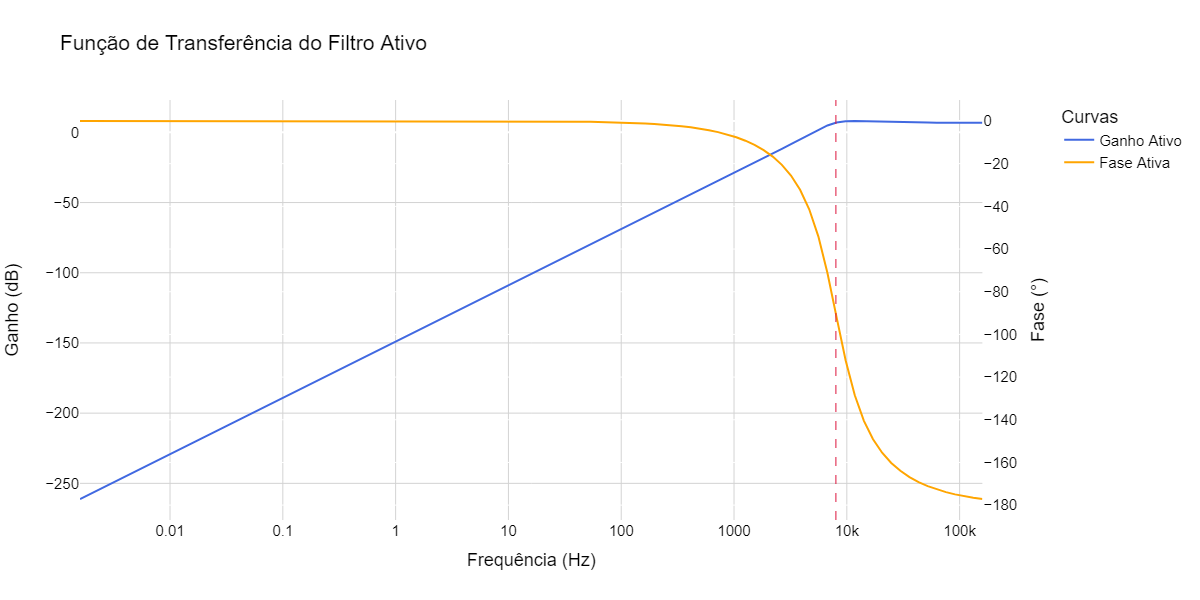

In [278]:
# Plotando a Função de Transferência do circuito (Diagrama de Bode)

fig = make_subplots(specs=[[dict(secondary_y=True)]])

# Parâmetros do Gráfico
fig.update_layout(
    title='Função de Transferência do Filtro Ativo',
    xaxis_title='Frequência (Hz)',
    legend_title='Curvas',
    plot_bgcolor='white',
    font=dict(
        family='Arial',
        size=15,
        color='black'
    ),
    xaxis=dict(
        gridcolor='lightgray'
    ),
    yaxis=dict(
        gridcolor='lightgray'
    )
)

fig.update_xaxes(type='log')

fig.update_yaxes(title_text='Ganho (dB)',
                 secondary_y=False)

fig.update_yaxes(title_text='Fase (°)', 
                 secondary_y=True)

MF_HP_A = signal.TransferFunction([-2.2, 0, 0], [1, 50.15*1e3, 2.51*1e9]) # Função de Transferência Atviva

w_a, ganho_a, fase_a = signal.bode(MF_HP_A)  # Retorna a frequência complexa w, a magnitude e a fase da função de transferência
freq_a = w_a/(2*np.pi) # Conversão de rad/s para Hz

fig.add_trace(go.Scatter(
    name='Ganho Ativo',
    mode='lines', 
    line_color='royalblue',
    x=freq_a, 
    y=ganho_a
    ),
    secondary_y=False
)


fig.add_trace(go.Scatter(
    name='Fase Ativa',
    mode='lines', 
    line_color='orange',
    x=freq_a, 
    y=fase_a
    ),
    secondary_y=True    
)

fig.add_vline(x=8*1e3, line_width=1, line_dash='dash', line_color='crimson')

fig.show(renderer='png', width=1200, height=600)

## Questão 2

Para efeitos comparativos, plote a função de transferência do circuito junto com o **Filtro Passivo** de igual característica.

---

### Memorial de Cálculo do Filtro Passivo

Para isso, devemos encontrar a função de transferência de um filtro passivo passa-alta, com frequência de corte $\omega_c = 8 \text{ kHz}$. Escolhendo um circuito RC, a função de transferência do filtro é da forma: 

$$ H(s) = \frac{sRC}{1+sRC}$$

e sua frequência de corte $\omega_c$ igual a: 

$$ \omega_c = \frac{1}{RC}$$

Escolhendo $R = 1\text{ k}\Omega $ , o capacitor $C$ deve ser igual a: 

$$ 8\cdot 10^3 = \frac{1}{1\cdot 10^3 \cdot C} $$
$$ C = 125 \text{ nF}$$

A função de transferência do filtro passivo será: 

$$ H(s) = \frac{s125\cdot10^{-6}}{s125\cdot10^{-6}+1}$$

---

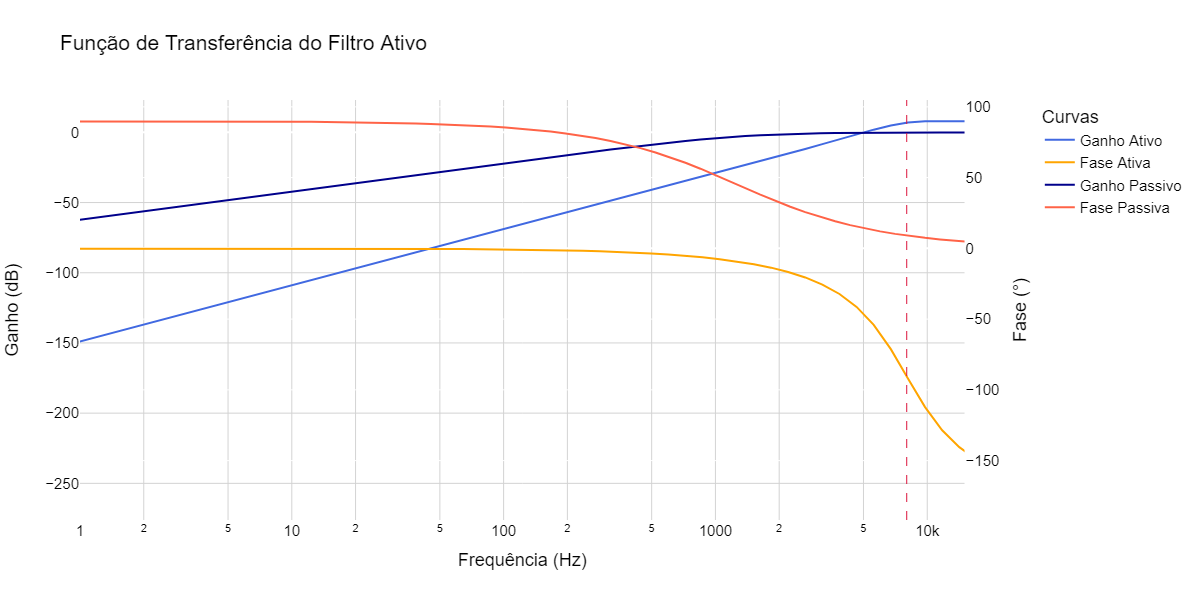

In [279]:
# Comparação das duas Funções de Transferência

fig.update_xaxes(range=[0,np.log10(15*1e3)])

MF_HP_P = signal.TransferFunction([125*1e-6, 0], [125*1e-6, 1]) # Função de Transferência Passiva

w_p, ganho_p, fase_p = signal.bode(MF_HP_P)  # Retorna a frequência complexa w, a magnitude e a fase da função de transferência
freq_p = w_p/(2*np.pi) # Conversão de rad/s para Hz

fig.add_trace(go.Scatter(
    name='Ganho Passivo',
    mode='lines', 
    line_color='darkblue',
    x=freq_p, 
    y=ganho_p
    ),
    secondary_y=False
)


fig.add_trace(go.Scatter(
    name='Fase Passiva',
    mode='lines', 
    line_color='tomato',
    x=freq_p, 
    y=fase_p
    ),
    secondary_y=True    
)

fig.show(renderer='png', width=1200, height=600)

## Questão 3

Realize a montagem do circuito em placa protoboard. Para tanto, utilize os componentes adequados, assim como as ligaçõoes e adequações necessárias para utilização do(s) amplificador(es) operacional(ais) conforme indicado no *datasheet*.

---

### Ajuste de Valores Nominais

Ajustando os valores encontrados para componentes encontrados comercialmente, temos: 

$$C_1 = C_3 = 68 \text{ nF}$$
$$C_4 = 33 \text{ nF}$$
$$R_2 = (68 + 56) \space \Omega$$
$$R_5 = 1.6 \text{k} \space \Omega$$

---

### Montagem no Ambiente Virtual - LTSpice

---